# 신경망 학습

## - 훈련 데이터와 시험 데이터
기계학습 문제는 데이터를 위의 두가지로 나눠 학습과 실험을 수행하는 것이 일반적이다.
우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다.
그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다.

## - 손실 함수
신경망 학습에서 사용하는 지표는 손실함수라고 한다.
이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로
평균 제곱 오차와 교체 엔트로피 오차를 사용한다.

### 평균 제곱 오차

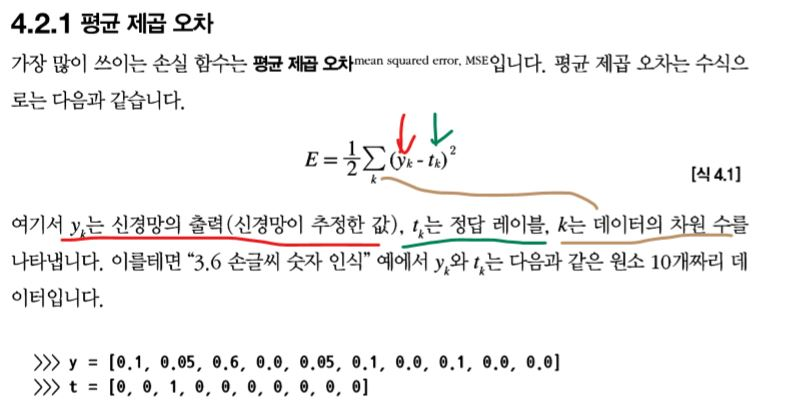

In [6]:
from IPython.display import Image

Image("17.jpg") 

### 교체 엔트로피 오차

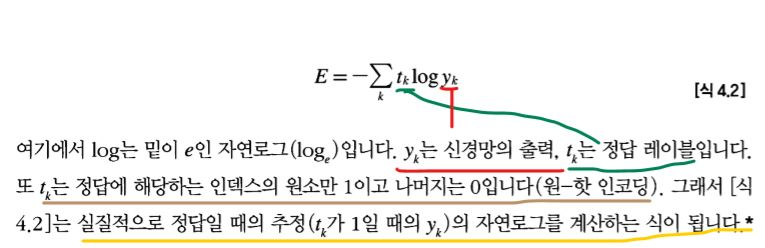

In [8]:
Image("18.jpg") 

In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 미니 배치 학습
훈련 데이터로부터 일부만 골라 학습을 수행합니다.
이 일부를 미니배치라고 합니다. 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100방만을 사용하여 학습하는 것입니다.

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7933833333333333, 0.7978
train acc, test acc | 0.8763666666666666, 0.8811
train acc, test acc | 0.89895, 0.9025
train acc, test acc | 0.9073666666666667, 0.9123
train acc, test acc | 0.9139666666666667, 0.9161
train acc, test acc | 0.9194166666666667, 0.9208
train acc, test acc | 0.9244166666666667, 0.925
train acc, test acc | 0.9281833333333334, 0.9295
train acc, test acc | 0.93225, 0.9327
train acc, test acc | 0.9349666666666666, 0.935
train acc, test acc | 0.9381166666666667, 0.9386
train acc, test acc | 0.93975, 0.9396
train acc, test acc | 0.9431, 0.9423
train acc, test acc | 0.9446666666666667, 0.9441
train acc, test acc | 0.9466, 0.9459
train acc, test acc | 0.9487166666666667, 0.9457


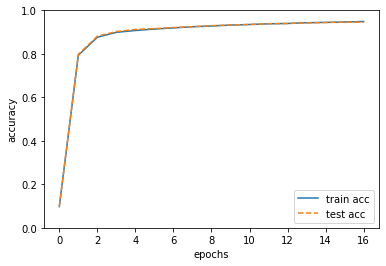

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### (배치용) 교차 엔트로피 오차 구현하기
교차 엔트로피 오차(데이터를 하나씩 처리하는 구현)을 조금만 바꿔주면 된다.

In [11]:
def cross_entropy_error(y, t):
    if y.ndim --1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# np.arange(batch_size) 는 0 부터 batch_size-1 까지 배열을 생성
# y[np.arange(batch_size), t] 는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출


### 왜 손실함수를 설정하는가?
'정확도'라는 지표를 놔두고 '손실함수의 값' 이라는 우회적인 방법을 택하는 이유는 뭘까요?
이 의문은 신경망 하가습에서의 '미분'의 역할에 주목하면 됩니다.
신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾습니다.
이때 매개변수의 기울기를 계산하고, 그 미분값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.


=>> 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.

In [ ]:
122